In [115]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN

In [3]:
#Import data
data = pd.read_csv("data/movieReplicationSet.csv")

data.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [5]:
df = pd.DataFrame(data)

#Grouping
sensation = df.iloc[:,400:420]
personality = df.iloc[:,420:464]
experience = df.iloc[:,464:474]

sensation = sensation.dropna()
personality = personality.dropna()
experience = experience.dropna()

## 1) What is the relationship between sensation seeking and movie experience?

In [37]:
#Data cleaning
sensation_experience = pd.concat([df.iloc[:,400:420],df.iloc[:,464:474]],axis = 1)
sensation_experience = sensation_experience.dropna()

sensation_q1 = sensation_experience.iloc[:,0:20]
experience_q1 = sensation_experience.iloc[:,20:]

17.45
8.887
8.191
6.537
5.787
5.218
4.927
4.817
4.494
4.288
3.976
3.729
3.702
3.356
3.074
2.945
2.779
2.503
1.718
1.621


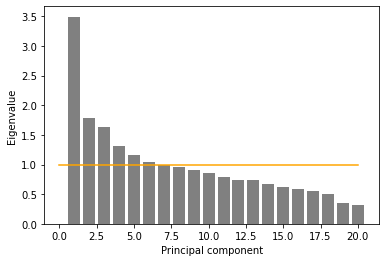

Number of factors selected by Kaiser criterion: 6
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 16


Text(0, 0.5, 'Loading')

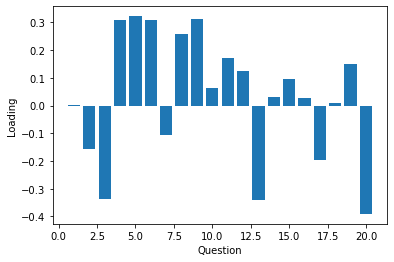

In [385]:
#PCA for "Sensation seeking"
zscoredData = stats.zscore(sensation_q1)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData1 = pd.DataFrame(pca.fit_transform(zscoredData))

covarExplained = eigVals/sum(eigVals)*100
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

question = 20
x = np.linspace(1,question,question)
plt.bar(x, eigVals, color='gray')
plt.plot([0,question],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))
print('Number of factors selected by elbow criterion: 1')
threshold = 90
eigSum = np.cumsum(covarExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')


29.481
18.776
8.761
8.488
7.666
6.978
5.751
5.551
4.402
4.146


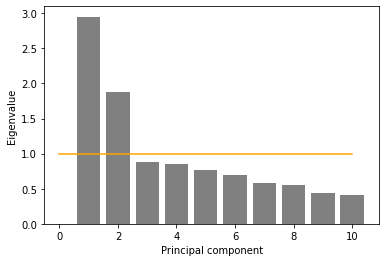

Number of factors selected by Kaiser criterion: 2
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 8


Text(0, 0.5, 'Loading')

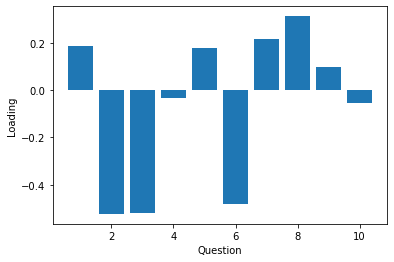

In [386]:
#PCA for "Movie Experience"
zscoredData = stats.zscore(experience_q1)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData2 = pd.DataFrame(pca.fit_transform(zscoredData))
covarExplained = eigVals/sum(eigVals)*100
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

question = 10
x = np.linspace(1,question,question)
plt.bar(x, eigVals, color='gray')
plt.plot([0,question],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))
print('Number of factors selected by elbow criterion: 1')
threshold = 90
eigSum = np.cumsum(covarExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')


In [392]:
#Correlation matrix
PC_sensation = rotatedData1.iloc[:,0:5]
PC_sensation_t = PC_sensation.transpose()
PC_experience = rotatedData2.iloc[:,0:2]
PC_experience_t = PC_experience.transpose()

r = np.corrcoef(PC_sensation_t, PC_experience_t)
r = pd.DataFrame(r).rename(columns={0: 'S1PC',1: 'S2PC',2:'S3PC',3:'S4PC',4:'S5PC',5:'E1PC',6:'E2PC'},index={0: 'S1PC',1: 'S2PC',2:'S3PC',3:'S4PC',4:'S5PC',5:'E1PC',6:'E2PC'})
r

,S1PC,S2PC,S3PC,S4PC,S5PC,E1PC,E2PC
S1PC,1.000000e+00,1.211187e-16,2.833766e-16,1.850728e-16,1.868202e-16,1.248172e-02,-4.431272e-02
S2PC,1.211187e-16,1.000000e+00,-6.555628e-16,-2.457434e-16,6.258682e-17,-1.318290e-01,2.876969e-02
S3PC,2.833766e-16,-6.555628e-16,1.000000e+00,2.612921e-16,-7.020984e-17,8.048170e-02,4.281407e-02
S4PC,1.850728e-16,-2.457434e-16,2.612921e-16,1.000000e+00,-4.533099e-16,-1.167748e-01,8.714434e-03
S5PC,1.868202e-16,6.258682e-17,-7.020984e-17,-4.533099e-16,1.000000e+00,1.393660e-01,-5.862600e-02
E1PC,1.248172e-02,-1.318290e-01,8.048170e-02,-1.167748e-01,1.393660e-01,1.000000e+00,4.780337e-16
E2PC,-4.431272e-02,2.876969e-02,4.281407e-02,8.714434e-03,-5.862600e-02,4.780337e-16,1.000000e+00


## 2) Is there evidence of personality types based on the data of these research participants? If so, characterize these types both quantitatively and narratively.

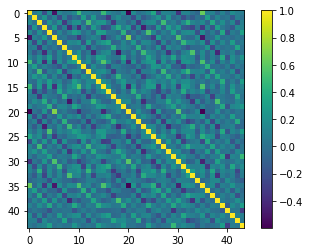

In [45]:
#Correlation matrix heatmap shows that there exists correlation between the factors of Personality
r = np.corrcoef(personality,rowvar=False)
plt.imshow(r) 
plt.colorbar()
plt.show()

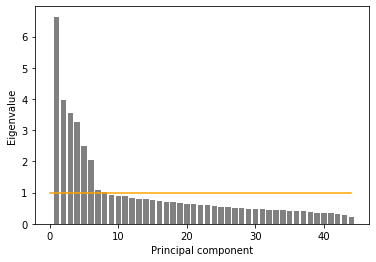

Number of factors selected by Kaiser criterion: 8
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 32


Text(0, 0.5, 'Loading')

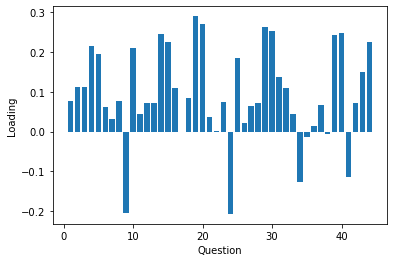

In [58]:
 #PCA for "Personality"
zscoredData = stats.zscore(personality)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData = pd.DataFrame(pca.fit_transform(zscoredData))
PC1_experience = rotatedData.iloc[:,0]
#covarExplained = eigVals/sum(eigVals)*100
#for ii in range(len(covarExplained)):
    #print(covarExplained[ii].round(3))

question = 44
x = np.linspace(1,question,question)
plt.bar(x, eigVals, color='gray')
plt.plot([0,question],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))
print('Number of factors selected by elbow criterion: 1')
threshold = 90
eigSum = np.cumsum(covarExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')

In [ ]:
#Decide the new factors---meaning of the first and second principal component which account for biggest variance

In [ ]:
#Degree of emotional and mental sensitivity

In [51]:
personality.iloc[:,13]

1       3.0
2       4.0
3       4.0
4       4.0
5       4.0
       ... 
1092    4.0
1093    4.0
1094    4.0
1095    4.0
1096    4.0
Name: Can be tense, Length: 1000, dtype: float64

In [52]:
personality.iloc[:,18]

1       3.0
2       4.0
3       5.0
4       4.0
5       5.0
       ... 
1092    4.0
1093    5.0
1094    5.0
1095    4.0
1096    4.0
Name: Worries a lot, Length: 1000, dtype: float64

In [53]:
personality.iloc[:,19]

1       5.0
2       4.0
3       4.0
4       4.0
5       4.0
       ... 
1092    4.0
1093    5.0
1094    4.0
1095    5.0
1096    4.0
Name: Has an active imagination, Length: 1000, dtype: float64

In [54]:
personality.iloc[:,28]

1       4.0
2       4.0
3       5.0
4       4.0
5       5.0
       ... 
1092    4.0
1093    5.0
1094    1.0
1095    5.0
1096    4.0
Name: Can be moody, Length: 1000, dtype: float64

In [55]:
personality.iloc[:,29]

1       5.0
2       4.0
3       5.0
4       4.0
5       5.0
       ... 
1092    5.0
1093    4.0
1094    5.0
1095    5.0
1096    5.0
Name: Values artistic/aesthetic experiences, Length: 1000, dtype: float64

In [56]:
personality.iloc[:,38]

1       2.0
2       4.0
3       4.0
4       4.0
5       5.0
       ... 
1092    4.0
1093    5.0
1094    4.0
1095    5.0
1096    2.0
Name: Gets nervous easily, Length: 1000, dtype: float64

In [57]:
personality.iloc[:,39]

1       3.0
2       4.0
3       4.0
4       3.0
5       1.0
       ... 
1092    4.0
1093    5.0
1094    5.0
1095    4.0
1096    4.0
Name: Likes to reflect/play with ideas, Length: 1000, dtype: float64

Text(0, 0.5, 'Loading')

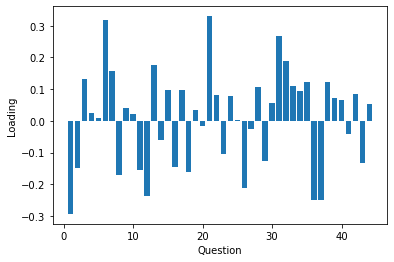

In [59]:
whichPrincipalComponent = 2 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')

In [ ]:
The degree of introversion

In [62]:
personality.iloc[:,0]

1       2.0
2       4.0
3       5.0
4       4.0
5       1.0
       ... 
1092    4.0
1093    5.0
1094    4.0
1095    4.0
1096    5.0
Name: Is talkative, Length: 1000, dtype: float64

In [63]:
personality.iloc[:,5]

1       5.0
2       3.0
3       3.0
4       3.0
5       4.0
       ... 
1092    3.0
1093    4.0
1094    5.0
1095    5.0
1096    3.0
Name: Is reserved, Length: 1000, dtype: float64

In [64]:
personality.iloc[:,20]

1       5.0
2       2.0
3       2.0
4       4.0
5       5.0
       ... 
1092    4.0
1093    4.0
1094    4.0
1095    5.0
1096    2.0
Name: Tends to be quiet, Length: 1000, dtype: float64

In [65]:
personality.iloc[:,30]

1       5.0
2       4.0
3       4.0
4       4.0
5       5.0
       ... 
1092    4.0
1093    5.0
1094    4.0
1095    5.0
1096    3.0
Name: Is sometimes shy/inhibited, Length: 1000, dtype: float64

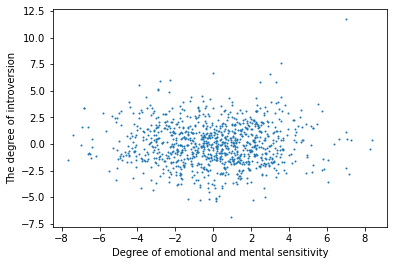

In [67]:
#Visualize our data in the new coordinate system:
plt.plot(rotatedData.iloc[:,0],rotatedData.iloc[:,1],'o',markersize=1)
plt.xlabel('Degree of emotional and mental sensitivity')
plt.ylabel('The degree of introversion')
plt.show()

In [68]:
#Clustering
# Store our transformed data - the predictors - as x:
X = np.column_stack((rotatedData.iloc[:,0],rotatedData.iloc[:,1]))

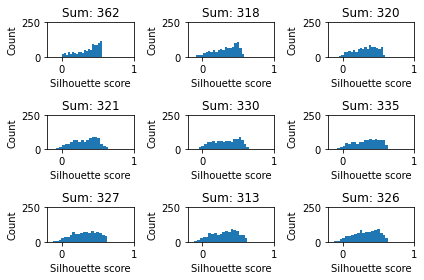

In [71]:
# Silhouette: How similar to points in cluster vs. others, arbitrariness
# Init:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(X) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(X,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

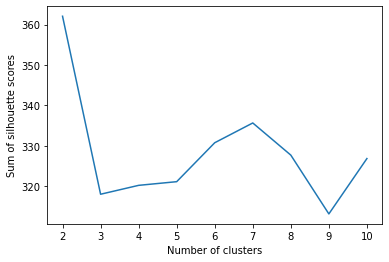

In [72]:
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()
#Peak: 7 clusters

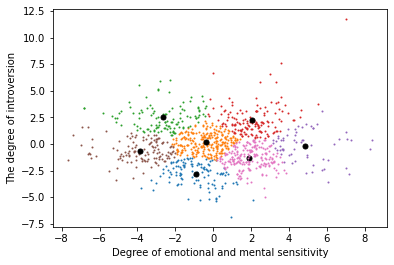

In [74]:
# Recompute kMeans:
numClusters = 7
kMeans = KMeans(n_clusters = numClusters).fit(X) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(X[plotIndex,0],X[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Degree of emotional and mental sensitivity')
    plt.ylabel('The degree of introversion')
    

## 3) Are movies that are more popular rated higher than movies that are less popular?

In [393]:
#Data matrix of 400 movie ratings
movies = data.iloc[:,0:400]

In [394]:
#Element-wise remove nan
movies_remove_nan = []
for i in range(400):
    R = movies.iloc[:,i]
    R = R.dropna().to_numpy()
    movies_remove_nan.append(R)

#Number of ratings
n_ratings = []
for i in range(len(movies_remove_nan)):
    n = len(movies_remove_nan[i])
    n_ratings.append(n)

#Median n of ratings
n_median = np.median(n_ratings)

#Sort movies into popular and not popular (To display the difference more clearly, 
#we will ignore movies whose number of ratings equal to median number of ratings)
popular = []
not_popular = []
for i in range(len(movies_remove_nan)):
    if n_ratings[i] > n_median:
        popular.append(movies_remove_nan[i])
    if n_ratings[i] < n_median:
        not_popular.append(movies_remove_nan[i])

#Compute the mean ratings of movies
for i in range(len(popular)):
    popular[i] = np.mean(popular[i])
    not_popular[i] = np.mean(not_popular[i])


In [395]:
#Independent T test
t1,p1 = stats.ttest_ind(popular, not_popular)
t1,p1

(17.756049269873696, 2.2696530276566144e-52)

In [398]:
#One-tail Mann Whitney U test
u1,p1 = stats.mannwhitneyu(popular ,not_popular, alternative='greater')
u1,p1

(35404.0, 8.485716560078964e-41)

## 4) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [104]:
#Extract the column of the movie and gender and join them as a dataframe
movieName = data.columns[0:400]
np.where(movieName=="Shrek (2001)")

(array([87]),)

In [131]:
shrek = data.iloc[:,87]
gender = data.iloc[:,474]
shrek_gender = pd.DataFrame(pd.concat([shrek,gender],axis=1))
shrek_gender = shrek_gender.rename(columns={"Shrek (2001)": "Shrek(2001)", "Gender identity (1 = female; 2 = male; 3 = self-described)": "Gender"})
shrek_gender

,Shrek(2001),Gender
0,3.0,1.0
1,3.0,1.0
2,3.5,1.0
3,0.5,1.0
4,3.0,1.0
...,...,...
1092,3.0,1.0
1093,4.0,1.0
1094,3.5,1.0
1095,2.5,1.0


In [143]:
#get the seperate groups of male and female
gender_group = shrek_gender.groupby('Gender')
female = gender_group.get_group(1)
male = gender_group.get_group(2)

In [144]:
#Extract the ratings from two groups, remove nan, and reset index
female = female.iloc[:,0].dropna().reset_index(drop = True)
male = male.iloc[:,0].dropna().reset_index(drop = True)

In [146]:
#two-sided Mann-Whitney U test
u,p = stats.mannwhitneyu(female,male)
u,p

(96830.5, 0.050536625925559006)

## 5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [149]:
#Extract the column of the movie and only child column and join them as a dataframe
movieName = data.columns[0:400]
np.where(movieName=="The Lion King (1994)")

(array([220]),)

In [179]:
LK = data.iloc[:,220]
child = data.iloc[:,475]
LK_child = pd.DataFrame(pd.concat([LK,child],axis=1))
LK_child = LK_child.rename(columns={"The Lion King (1994)": "The Lion King (1994)", "Are you an only child? (1: Yes; 0: No; -1: Did not respond)": "Child"})
LK_child

,The Lion King (1994),Child
0,4.0,0
1,NaN,0
2,4.0,1
3,3.0,0
4,4.0,1
...,...,...
1092,3.5,0
1093,3.5,0
1094,NaN,0
1095,NaN,0


In [180]:
#get the seperate groups of only child and child with siblings 
LK_child = LK_child.groupby("Child")
onlyChild = LK_child.get_group(1)
withSiblings = LK_child.get_group(0)

In [181]:
#Extract the ratings from two groups, remove nan, and reset index
onlyChild = onlyChild.iloc[:,0].dropna().reset_index(drop = True)
withSiblings = withSiblings.iloc[:,0].dropna().reset_index(drop = True)


In [182]:
#two-sided Mann-Whitney U test
u,p = stats.mannwhitneyu(onlyChild,withSiblings)
u,p

(52929.0, 0.04319872995682849)

In [183]:
#one-sided
u,p = stats.mannwhitneyu(onlyChild,withSiblings, alternative = 'greater')
u,p

(52929.0, 0.978419092554931)

In [184]:
#one-sided
u,p = stats.mannwhitneyu(onlyChild,withSiblings, alternative = 'less')
u,p

(52929.0, 0.021599364978414245)

## 6) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

In [187]:
#Extract the column of the movie and only child column and join them as a dataframe
np.where(movieName=="The Wolf of Wall Street (2013)")

(array([357]),)

In [190]:
WWS = data.iloc[:,357]
social = data.iloc[:,476]
WWS_social = pd.DataFrame(pd.concat([WWS,social],axis=1))
WWS_social = WWS_social.rename(columns={"The Wolf of Wall Street (2013)": "The Wolf of Wall Street (2013)", "Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)": "Social preference"})
WWS_social

,The Wolf of Wall Street (2013),Social preference
0,NaN,1
1,NaN,0
2,NaN,0
3,4.0,1
4,3.0,1
...,...,...
1092,NaN,0
1093,3.5,0
1094,2.0,0
1095,NaN,1


In [191]:
#get the seperate groups of watch socially and watch alone
WWS_social = WWS_social.groupby("Social preference")
socially = WWS_social.get_group(0)
alone = WWS_social.get_group(1)

In [192]:
#Extract the ratings from two groups, remove nan, and reset index
socially = socially.iloc[:,0].dropna().reset_index(drop = True)
alone = alone.iloc[:,0].dropna().reset_index(drop = True)

In [399]:
#one-sided Mann-Whitney U test
u,p = stats.mannwhitneyu(socially,alone, alternative = 'greater')
u,p

(49303.5, 0.9436657996253056)

In [400]:
u,p = stats.mannwhitneyu(socially,alone, alternative = 'less')
u,p

(49303.5, 0.05638214666114455)

## 7) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers?

In [217]:
#Star Wars
#Find the movies
movie = 'Star Wars'
series = []
for i in range(len(movieName)):
    if movie in movieName[i]:
        series.append(movieName[i])
#Find the column of each movie
for i in series:
    index = np.where(movieName==i)
    print(i, index)
#Extract the columns, element-wise drop nan, and reset index
mv1 = data.iloc[:,21].dropna().reset_index(drop = True)
mv2 = data.iloc[:,174].dropna().reset_index(drop = True)
mv3 = data.iloc[:,342].dropna().reset_index(drop = True)
mv4 = data.iloc[:,273].dropna().reset_index(drop = True)
mv5 = data.iloc[:,93].dropna().reset_index(drop = True)
mv6 = data.iloc[:,336].dropna().reset_index(drop = True)

Star Wars: Episode IV - A New Hope (1977) (array([21]),)
Star Wars: Episode II - Attack of the Clones (2002) (array([93]),)
Star Wars: Episode V - The Empire Strikes Back (1980) (array([174]),)
Star Wars: Episode 1 - The Phantom Menace (1999) (array([273]),)
Star Wars: Episode VII - The Force Awakens (2015) (array([336]),)
Star Wars: Episode VI - The Return of the Jedi (1983) (array([342]),)


In [221]:
#Add the cleaned ratings into a single array
series_rating = [mv1,mv2,mv3,mv4,mv5,mv6]

#Use loop to do several hypothesis tests simultaneously 
for i in range(len(series_rating)-1):
    u,p = stats.mannwhitneyu(series_rating[i],series_rating[i+1])
    print(u,p)

125332.0 0.08189846600030656
114952.0 0.3034256316184082
133033.5 4.730789191200012e-15
124054.5 0.4503093559063731
78970.0 1.4828150905774305e-27


In [223]:
#Note that the ratings between the third and forth, fifth and sixth movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[2],series_rating[3], alternative = 'greater')
u,p
#Viewers' experience of the forth Star Wars movie dropped

(133033.5, 2.365394595600006e-15)

In [225]:
u,p = stats.mannwhitneyu(series_rating[4],series_rating[5], alternative = 'less')
u,p
#Viewers' experience of the sixth Star Wars movie improved

(78970.0, 7.414075452887152e-28)

In [227]:
#Harry Potter
#Find the movies
movie = 'Harry Potter'
series = []
for i in range(len(movieName)):
    if movie in movieName[i]:
        series.append(movieName[i])
#Find the column of each movie
for i in series:
    index = np.where(movieName==i)
    print(i, index)
#Extract the columns, element-wise drop nan, and reset index
mv1 = data.iloc[:,230].dropna().reset_index(drop = True)
mv2 = data.iloc[:,394].dropna().reset_index(drop = True)
mv3 = data.iloc[:,387].dropna().reset_index(drop = True)
mv4 = data.iloc[:,258].dropna().reset_index(drop = True)

Harry Potter and the Sorcerer's Stone (2001) (array([230]),)
Harry Potter and the Deathly Hallows: Part 2 (2011) (array([258]),)
Harry Potter and the Goblet of Fire (2005) (array([387]),)
Harry Potter and the Chamber of Secrets (2002) (array([394]),)


In [228]:
#Add the cleaned ratings into a single array
series_rating = [mv1,mv2,mv3,mv4]

#Use loop to do several hypothesis tests simultaneously 
for i in range(len(series_rating)-1):
    u,p = stats.mannwhitneyu(series_rating[i],series_rating[i+1])
    print(u,p)
    
#The Harry Potter series has consistent ratings.

384178.0 0.09816683002933
342001.0 0.8040524609201452
331566.0 0.4973063104455706


In [230]:
#The Matrix
#Find the movies
movie = 'The Matrix'
series = []
for i in range(len(movieName)):
    if movie in movieName[i]:
        series.append(movieName[i])
#Find the column of each movie
for i in series:
    index = np.where(movieName==i)
    print(i, index)
#Extract the columns, element-wise drop nan, and reset index
mv1 = data.iloc[:,306].dropna().reset_index(drop = True)
mv2 = data.iloc[:,172].dropna().reset_index(drop = True)
mv3 = data.iloc[:,35].dropna().reset_index(drop = True)

The Matrix Revolutions (2003) (array([35]),)
The Matrix Reloaded (2003) (array([172]),)
The Matrix (1999) (array([306]),)


In [231]:
#Add the cleaned ratings into a single array
series_rating = [mv1,mv2,mv3]

#Use loop to do several hypothesis tests simultaneously 
for i in range(len(series_rating)-1):
    u,p = stats.mannwhitneyu(series_rating[i],series_rating[i+1])
    print(u,p)
    

100837.5 2.1376654433729527e-07
65932.5 0.24981112383243775


In [234]:
#Note that the ratings between the first and second movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[0],series_rating[1], alternative = 'greater')
u,p
#Viewers' experience of 'The Matrix' series dropped after the first movie.

(100837.5, 1.0688327216864763e-07)

In [237]:
#Indiana Jones
#Find the movies
movie = 'Indiana Jones'
series = []
for i in range(len(movieName)):
    if movie in movieName[i]:
        series.append(movieName[i])
#Find the column of each movie
for i in series:
    index = np.where(movieName==i)
    print(i, index)
#Extract the columns, element-wise drop nan, and reset index
mv1 = data.iloc[:,33].dropna().reset_index(drop = True)
mv2 = data.iloc[:,32].dropna().reset_index(drop = True)
mv3 = data.iloc[:,4].dropna().reset_index(drop = True)
mv4 = data.iloc[:,142].dropna().reset_index(drop = True)

Indiana Jones and the Last Crusade (1989) (array([4]),)
Indiana Jones and the Temple of Doom (1984) (array([32]),)
Indiana Jones and the Raiders of the Lost Ark (1981) (array([33]),)
Indiana Jones and the Kingdom of the Crystal Skull (2008) (array([142]),)


In [238]:
#Add the cleaned ratings into a single array
series_rating = [mv1,mv2,mv3,mv4]

#Use loop to do several hypothesis tests simultaneously 
for i in range(len(series_rating)-1):
    u,p = stats.mannwhitneyu(series_rating[i],series_rating[i+1])
    print(u,p)

97240.0 1.8017248346687264e-05
107144.0 0.3070842227239434
120933.0 0.00017791395232999937


In [242]:
#Note that the ratings between the first and second, third and forth movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[0],series_rating[1], alternative = 'greater')
u,p
#Viewers' experience of the second Indiana Jones movie dropped.

(97240.0, 9.008624173343632e-06)

In [240]:
#Note that the ratings between the third and forth, fifth and sixth movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[2],series_rating[3], alternative = 'greater')
u,p
#Viewers' experience of the forth Indiana Jones movie dropped again.

(120933.0, 8.895697616499968e-05)

In [244]:
#Jurassic Park
#Find the movies
movie = 'Jurassic Park'
series = []
for i in range(len(movieName)):
    if movie in movieName[i]:
        series.append(movieName[i])
#Find the column of each movie
for i in series:
    index = np.where(movieName==i)
    print(i, index)
#Extract the columns, element-wise drop nan, and reset index
mv1 = data.iloc[:,370].dropna().reset_index(drop = True)
mv2 = data.iloc[:,37].dropna().reset_index(drop = True)
mv3 = data.iloc[:,47].dropna().reset_index(drop = True)

The Lost World: Jurassic Park (1997) (array([37]),)
Jurassic Park III (2001) (array([47]),)
Jurassic Park (1993) (array([370]),)


In [245]:
#Add the cleaned ratings into a single array 
series_rating = [mv1,mv2,mv3]

#Use loop to do several hypothesis tests simultaneously 
for i in range(len(series_rating)-1):
    u,p = stats.mannwhitneyu(series_rating[i],series_rating[i+1])
    print(u,p)

188684.0 0.0006738642151062385
169371.5 0.00027537558821442277


In [246]:
#Note that the ratings between the first and second, second and third movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[0],series_rating[1], alternative = 'greater')
u,p
#Viewers' experience of the second Jurassic Park movie dropped.

(188684.0, 0.00033693210755311926)

In [247]:
#Note that the ratings between the first and second, second and third movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[1],series_rating[2], alternative = 'greater')
u,p
#Viewers' experience of the third Jurassic Park movie dropped again.

(169371.5, 0.00013768779410721138)

In [249]:
#Pirates of the Caribbean
#Find the movies
movie = 'Pirates of the Caribbean'
series = []
for i in range(len(movieName)):
    if movie in movieName[i]:
        series.append(movieName[i])
#Find the column of each movie
for i in series:
    index = np.where(movieName==i)
    print(i, index)
#Extract the columns, element-wise drop nan, and reset index
mv1 = data.iloc[:,351].dropna().reset_index(drop = True)
mv2 = data.iloc[:,75].dropna().reset_index(drop = True)
mv3 = data.iloc[:,204].dropna().reset_index(drop = True)

Pirates of the Caribbean: Dead Man's Chest (2006) (array([75]),)
Pirates of the Caribbean: At World's End (2007) (array([204]),)
Pirates of the Caribbean: The Curse of the Black Pearl (2003) (array([351]),)


In [250]:
#Add the cleaned ratings into a single array
series_rating = [mv1,mv2,mv3]

#Use loop to do several hypothesis tests simultaneously 
for i in range(len(series_rating)-1):
    u,p = stats.mannwhitneyu(series_rating[i],series_rating[i+1])
    print(u,p)

308667.0 8.817372076227087e-06
258329.5 0.25147758276137844


In [251]:
#Note that the ratings between the first and second movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[0],series_rating[1], alternative = 'greater')
u,p
#Viewers' experience of 'Pirates of the Caribbean' series dropped after the first movie.

(308667.0, 4.408686038113543e-06)

In [253]:
#Toy Story
#Find the movies
movie = 'Toy Story'
series = []
for i in range(len(movieName)):
    if movie in movieName[i]:
        series.append(movieName[i])
#Find the column of each movie
for i in series:
    index = np.where(movieName==i)
    print(i, index)
#Extract the columns, element-wise drop nan, and reset index
mv1 = data.iloc[:,276].dropna().reset_index(drop = True)
mv2 = data.iloc[:,157].dropna().reset_index(drop = True)
mv3 = data.iloc[:,171].dropna().reset_index(drop = True)

Toy Story 2 (1999) (array([157]),)
Toy Story 3 (2010) (array([171]),)
Toy Story (1995) (array([276]),)


In [254]:
#Add the cleaned ratings into a single array
series_rating = [mv1,mv2,mv3]

#Use loop to do several hypothesis tests simultaneously 
for i in range(len(series_rating)-1):
    u,p = stats.mannwhitneyu(series_rating[i],series_rating[i+1])
    print(u,p)

472908.0 6.329730946125958e-06
356610.0 8.408513827408602e-05


In [255]:
#Note that the ratings between the first and second, second and third movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[0],series_rating[1], alternative = 'greater')
u,p
#Viewers' experience of the second Toy Story movie dropped.

(472908.0, 3.164865473062979e-06)

In [257]:
#Note that the ratings between the first and second, second and third movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[1],series_rating[2], alternative = 'less')
u,p
#Viewers' experience of the third Toy Story movie improved.

(356610.0, 4.204256913704301e-05)

In [259]:
#Batman
#Find the movies
movie = 'Batman'
series = []
for i in range(len(movieName)):
    if movie in movieName[i]:
        series.append(movieName[i])
#Find the column of each movie
for i in series:
    index = np.where(movieName==i)
    print(i, index)
#Extract the columns, element-wise drop nan, and reset index
mv1 = data.iloc[:,181].dropna().reset_index(drop = True)
mv2 = data.iloc[:,46].dropna().reset_index(drop = True)
mv3 = data.iloc[:,235].dropna().reset_index(drop = True)

Batman & Robin (1997) (array([46]),)
Batman (1989) (array([181]),)
Batman: The Dark Knight (2008) (array([235]),)


In [260]:
#Add the cleaned ratings into a single array
series_rating = [mv1,mv2,mv3]

#Use loop to do several hypothesis tests simultaneously 
for i in range(len(series_rating)-1):
    u,p = stats.mannwhitneyu(series_rating[i],series_rating[i+1])
    print(u,p)

81864.5 1.5631433682224575e-09
63650.5 4.5301045329475817e-39


In [261]:
#Note that the ratings between the first and second, second and third movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[0],series_rating[1], alternative = 'greater')
u,p
#Viewers' experience of the second Batman movie dropped.

(81864.5, 7.815716841112287e-10)

In [263]:
#Note that the ratings between the first and second, second and third movies are inconsistent
#Do one-sided tests
u,p = stats.mannwhitneyu(series_rating[1],series_rating[2], alternative = 'less')
u,p
#Viewers' experience of the third Batman movie improved.

(63650.5, 2.2650522664737908e-39)

## 8) Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from personality factors only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [329]:
#Impute missing ratings use multivariate imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data)
data_imputed = data
data_imputed = imp_mean.transform(data_imputed)

data_imputed_df = pd.DataFrame(data_imputed)
data_imputed_df.head()

/Users/kd/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


,0,1,2,3,4,5,6,7,8,9,...,467,468,469,470,471,472,473,474,475,476
0,2.060089,1.219609,4.000000,3.452489,3.000000,3.475948,2.856775,1.759794,2.873154,2.469153,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0.0,1.0
1,2.585111,2.098402,1.500000,1.852190,2.439677,2.953439,2.677461,3.343155,1.715700,2.437288,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0.0,0.0
2,3.458714,2.792202,3.005196,1.895448,3.108396,2.516230,2.455243,3.078429,2.685970,2.822577,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1.0,0.0
3,2.404148,1.971983,2.000000,2.023382,3.000000,2.542075,1.446218,3.257445,2.976212,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0.0,1.0
4,1.561322,2.241729,3.500000,1.197154,0.500000,2.262482,0.500000,1.000000,2.089817,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1.0,1.0


In [333]:
#Generate the movie rating data and personality data
movies_imputed = data_imputed_df.iloc[:,0:400]
personality_imputed = data_imputed_df.iloc[:,420:464]

In [355]:
#Cross validation and Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Seperate training and testing data (7:3)
X_train, X_test, y_train, y_test = train_test_split(personality_imputed, movies_imputed, test_size=0.3, random_state=42)

#Create linear regression model using training set
regr = LinearRegression()
regr.fit(X_train, y_train)

#Use the model above to predict the test set
y_test_bar = regr.predict(X_test) 

#Compute the rmse
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_test_bar))

rmse

0.7776553777395455

## 9) Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from gender identity, sibship status and social viewing preferences (columns 475-477) only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [350]:
#Generate the gender identity,sibship status and social viewing preferences columns
GSS_imputed = data_imputed_df.iloc[:,474:477]

In [361]:
#Cross validation and Linear regresssion
#Seperate training and testing data (7:3)
X_train, X_test, y_train, y_test = train_test_split(GSS_imputed, 
                                                    movies_imputed, 
                                                    test_size=0.3, 
                                                    random_state=42)

#Create linear regression model using training set
regr = LinearRegression()
regr.fit(X_train, y_train)

#Use the model above to predict the test set
y_test_bar = regr.predict(X_test) 

#Compute the rmse
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_test_bar))

rmse

0.8058700880419042

## 10) Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from all available factors that are not movie ratings (columns 401- 477). Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.


In [362]:
#Generate the columns
all_imputed = data_imputed_df.iloc[:,400:477]

In [363]:
#Cross validation and Linear regresssion
#Seperate training and testing data (7:3)
X_train, X_test, y_train, y_test = train_test_split(all_imputed, movies_imputed, test_size=0.3, random_state=42)

#Create linear regression model using training set
regr = LinearRegression()
regr.fit(X_train, y_train)

#Use the model above to predict the test set
y_test_bar = regr.predict(X_test) 

#Compute the rmse
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_test_bar))

rmse

0.7328587349472734